# Aggregate metrics for Job Characteristics

Some of these indicies combine multiple metrics. All indicies are normalized.

## Method

For 1+ underlying methics in the Occupational Requirements dataset, the raw values will be normalized (z-scores). Those scores will be summed (possiblity weighted) and the sum is normalized to create the final metric.

## Setup

1. Load preprocessed or data
2. Load metadata about estimates

In [1]:
import matplotlib
import pandas

In [2]:
data = pandas.read_csv('ordata-processed.csv', converters={'soc_code': str})
data.head()

,soc_code,00064,00065,00066,00067,00068,00069,00070,00071,00072,...,01076,01077,01080,01081,01084,01085,01087,01088,01090,01091
0,000000,4.0,30.3,5.0,3.5,6.7,13.4,19.1,15.9,2.1,...,25.8,19.3,77.9,22.1,11.0,22.9,18.2,15.7,1.4,32.5
1,110000,0.7,NaN,NaN,NaN,1.4,4.8,15.8,57.7,18.4,...,9.0,24.8,74.6,25.4,8.9,17.6,11.5,15.0,1.2,25.3
2,111011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.7,56.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,111021,NaN,NaN,NaN,NaN,NaN,6.1,16.7,51.3,20.9,...,11.0,19.1,70.4,29.6,10.7,8.3,NaN,15.7,NaN,18.4
4,112021,NaN,NaN,NaN,NaN,NaN,NaN,14.6,57.6,24.9,...,NaN,21.8,65.3,34.7,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
metadata = pandas.read_csv('ordata/or.estimate', delimiter='\t', index_col=False)
metadata['estimate_code'] = metadata['estimate_code'].map(lambda c: '{:05d}'.format(c))
metadata.head()

,estimate_code,estimate_text,display_level,selectable,sort_sequence
0,00064,"Percent of workers, svp is short demonstration...",0,T,889
1,00065,"Percent of workers, svp is beyond short demons...",0,T,890
2,00066,"Percent of workers, svp is over 1 month, up to...",0,T,891
3,00067,"Percent of workers, svp is over 3 months, up t...",0,T,892
4,00068,"Percent of workers, svp is over 6 months, up t...",0,T,893


## Indicies

Aggregate metrics/indices for:
- Physicality
- Pace of work
- Variety
- Danger
- Communication
 - Type of interaction
- Entry-level/experienced
- Ambiguous decision making

### Physicality Index

Combines underlying metrics:

| Estimate code | Name |
|---------------|------|
|00128|Hours of standing/walking (50th Percentile - median)|
|01006|Percent of day where standing/walking is required (50th Percentile - median)|
|00235|Pounds maximum weight lifted/carried (25th Percentile)|
|00236|Pounds maximum weight lifted/carried (50th Percentile - median)|
|00758|Percent of workers, crawling is required|
|00759|Percent of workers, crouching is required|
|00647|Percent of workers, pushing/pulling with feet only is required, frequently|
|00648|Percent of workers, pushing/pulling with feet only is required, constantly|
|00298|Percent of workers, pushing/pulling with feet/legs is required, frequently|
|00828|Percent of workers, pushing/pulling with feet/legs is required|
|00829|Percent of workers, pushing/pulling with hands/arms is required|
|00364|Percent of workers, climbing ramps or stairs (structure-related) is required|
|00752|Percent of workers, climbing ramps or stairs (work-related) is required|
|00751|Percent of workers, climbing ladders, ropes, or scaffolds is required|
|00398|Percent of workers, stooping is required, frequently|
|00411|Percent of workers, kneeling is required, occasionally|
|00663|Percent of workers, strength is medium work|
|00664|Percent of workers, strength is heavy work|
|00665|Percent of workers, strength is very heavy work|
|00827|Percent of workers, pushing/pulling with feet only is required|

In [4]:
codes = [
'00128',
'01006',
'00235',
'00236',
'00758',
'00759',
'00647',
'00648',
'00298',
'00828',
'00829',
'00364',
'00752',
'00751',
'00398',
'00411',
'00663',
'00664',
'00665',
'00827'
]

In [5]:
data['00235'].hist()

In [6]:
normalized = pandas.DataFrame({
    c: (data[c] - data[c].mean()) / (data[c].std())
    for c in codes
})
normalized.head()

,00128,00235,00236,00298,00364,00398,00411,00647,00648,00663,00664,00665,00751,00752,00758,00759,00827,00828,00829,01006
0,0.013581,-0.771191,-0.182500,NaN,-0.352494,NaN,NaN,NaN,NaN,-0.230797,-0.852066,-0.615875,-0.818256,-0.466598,-0.734579,-0.162082,-0.646268,-0.571476,-0.558175,0.224009
1,-1.018953,-0.771191,-1.195952,NaN,0.033886,NaN,NaN,NaN,NaN,-1.030164,NaN,NaN,-1.075386,-0.486925,-1.055196,-1.147192,NaN,-1.524697,-1.582400,-1.158644
2,NaN,-0.771191,NaN,NaN,0.772148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.682065,NaN,NaN,NaN,NaN,NaN,-1.312272
3,-1.018953,-0.771191,-0.689226,NaN,-0.573283,NaN,NaN,NaN,NaN,-0.785102,NaN,NaN,-1.107934,-0.486925,NaN,-1.169182,NaN,-1.467854,-1.478734,-1.158644
4,NaN,NaN,-1.195952,NaN,-0.055810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.677999,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
normalized['sum'] = normalized.sum(axis=1)
normalized['index'] = (normalized['sum'] - normalized['sum'].mean()) / normalized['sum'].std()
normalized.head()

,00128,00235,00236,00298,00364,00398,00411,00647,00648,00663,...,00751,00752,00758,00759,00827,00828,00829,01006,sum,index
0,0.013581,-0.771191,-0.182500,NaN,-0.352494,NaN,NaN,NaN,NaN,-0.230797,...,-0.818256,-0.466598,-0.734579,-0.162082,-0.646268,-0.571476,-0.558175,0.224009,-6.724767,-1.101519
1,-1.018953,-0.771191,-1.195952,NaN,0.033886,NaN,NaN,NaN,NaN,-1.030164,...,-1.075386,-0.486925,-1.055196,-1.147192,NaN,-1.524697,-1.582400,-1.158644,-12.012815,-1.967703
2,NaN,-0.771191,NaN,NaN,0.772148,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.682065,NaN,NaN,NaN,NaN,NaN,-1.312272,-1.993380,-0.326516
3,-1.018953,-0.771191,-0.689226,NaN,-0.573283,NaN,NaN,NaN,NaN,-0.785102,...,-1.107934,-0.486925,NaN,-1.169182,NaN,-1.467854,-1.478734,-1.158644,-10.707027,-1.753814
4,NaN,NaN,-1.195952,NaN,-0.055810,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.677999,NaN,NaN,NaN,NaN,NaN,NaN,-1.929761,-0.316095


In [8]:
def create_index(df, columns, weights=None):
    if weights is None:
        weights = [1.] * len(columns)
    assert len(weights) == len(columns)
    normalized = {}
    for c, w in zip(columns, weights):
        normalized[c] = (data[c] - data[c].mean()) / (data[c].std())
        normalized[c] = (normalized[c] - normalized[c].min()) * w
    normalized = pandas.DataFrame(normalized)
    sums = normalized.sum(axis=1)
    return (sums - sums.mean()) / sums.std()

In [9]:
physicality_index = create_index(data, codes)
physicality_index.head()

0    0.399198
1   -0.449087
2   -0.751402
3   -0.428323
4   -0.911465
dtype: float64

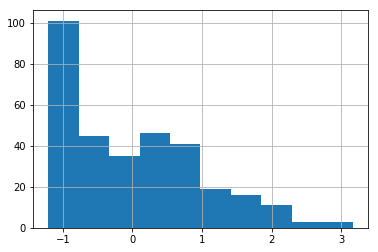

In [10]:
physicality_index.hist()

### Pace of work

| Estimate code | Name |
|---------------|------|
|01071|Percent of workers, pace of work is rapid|

In [11]:
pace_of_work_index = create_index(data, ['01071'])
pace_of_work_index.head()

0    0.589810
1    0.283505
2    0.962482
3   -0.517994
4   -0.517994
dtype: float64

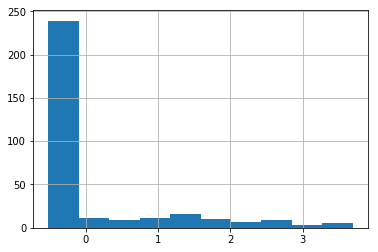

In [12]:
pace_of_work_index.hist()

### Variety

| Estimate code | Name |
|---------------|------|
|01056|Percent of workers, work location changes up to four times per year|
|01057|Percent of workers, work location changes more than four times per year|
|01059|Percent of workers, schedule changes yes|
|01080|Percent of workers, pace of work with faster/slower work periods is yes|

In [13]:
variety_index = create_index(data, ['01056', '01057', '01059', '01080'])
variety_index.head()

0    1.402005
1    1.588060
2    0.452748
3    1.616338
4    1.155236
dtype: float64

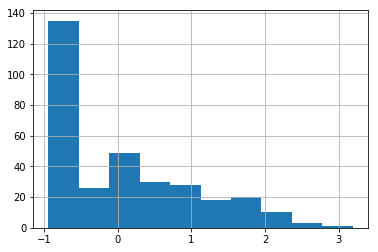

In [14]:
variety_index.hist()

### Danger

| Estimate code | Name |
|---------------|------|
|00427|Percent of workers exposed to extreme cold, constantly|
|00767|Percent of workers exposed to extreme cold|
|00440|Percent of workers exposed to extreme heat, frequently|
|00768|Percent of workers exposed to extreme heat|
|00454|Percent of workers exposed to wetness, frequently|
|00455|Percent of workers exposed to wetness, constantly|
|00845|Percent of workers exposed to wetness|
|00797|Percent of workers exposed to humidity|
|00786|Percent of workers exposed to hazardous contaminants|
|00787|Percent of workers exposed to hazardous contaminants, fully mitigated|
|00791|Percent of workers exposed to heavy vibrations|
|00792|Percent of workers exposed to high, exposed places|
|00793|Percent of workers exposed to high, exposed places, fully mitigated|
|00615|Percent of workers exposed to outdoors, frequently|
|00616|Percent of workers exposed to outdoors, constantly|
|00815|Percent of workers exposed to outdoors|
|00573|Percent of workers exposed to loud noise intensity level|
|00574|Percent of workers exposed to very loud noise intensity level|

In [15]:
danger_index = create_index(data, ['00427',
'00767',
'00440',
'00768',
'00454',
'00455',
'00845',
'00797',
'00786',
'00787',
'00791',
'00792',
'00793',
'00615',
'00616',
'00815',
'00573',
'00574'])
danger_index.head()

0    0.230495
1   -0.299971
2   -0.541306
3   -0.300960
4   -0.588087
dtype: float64

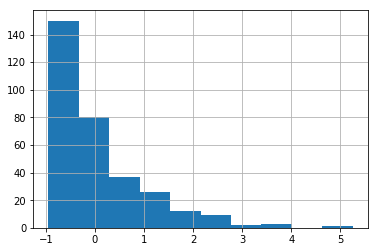

In [16]:
danger_index.hist()

### Communication

| Estimate code | Weight | Name |
|---------------|--------|------|
|01045|3|Percent of workers, frequency of contact with other contacts is continuous|
|01046|2|Percent of workers, frequency of contact with other contacts is more than once per hour|
|01047|1|Percent of workers, frequency of contact with other contacts is more than once per day|
|01050|3|Percent of workers, frequency of contact with regular contacts is continuous|	
|01051|2|Percent of workers, frequency of contact with regular contacts is more than once per hour|
|01052|1|Percent of workers, frequency of contact with regular contacts is more than once per day|
|00561|3|Percent of workers, communicating verbally is required, constantly|
|00560|2|Percent of workers, communicating verbally is required, frequently|
|00559|1|Percent of workers, communicating verbally is required, occasionally|

In [17]:
regular_contact_freq_index = create_index(data, ['01045', '01046', '01047'], [3,2,1])
other_contact_freq_index = create_index(data, ['01050', '01051', '01052'], [3,2,1])
communication_index = create_index(data, ['01045', '01046', '01047', '01050', '01051', '01052', '00561', '00560', '00559'], [3,2,1,3,2,1,3,2,1])
communication_index.head()

0    0.217566
1    0.215913
2    0.540168
3    0.777170
4   -0.050012
dtype: float64

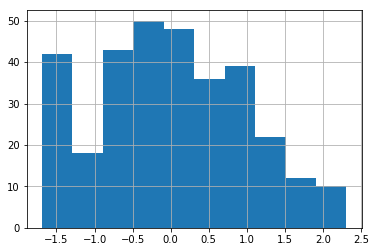

In [18]:
communication_index.hist()

In [19]:
contact_type_ratio = regular_contact_freq_index / (regular_contact_freq_index + other_contact_freq_index)
contact_type_ratio = (contact_type_ratio - contact_type_ratio.min()) / (contact_type_ratio.max() - contact_type_ratio.min())
contact_type_ratio.head()

0    0.042559
1    0.042366
2    0.037399
3    0.040205
4    0.040989
dtype: float64

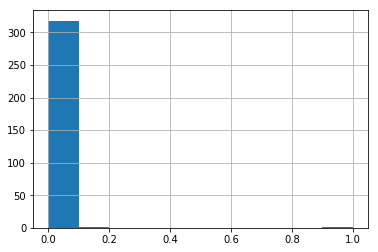

In [20]:
contact_type_ratio.hist()

#### Type of interaction

Regular Contacts:

| Estimate Code | Weight | Name | 
| ------------- | ------ | ---- |
|01030|1|Percent of workers, type of interaction with regular contacts is factual info exchange|
|01031|2|Percent of workers, type of interaction with regular contacts is coordinating
|01032|3|Percent of workers, type of interaction with regular contacts is gentle persuading|
|01033|4|Percent of workers, type of interaction with regular contacts is influencing|
|01034|5|Percent of workers, type of interaction with regular contacts is resolving controversial issues|

Other Contacts:

| Estimate Code | Weight | Name | 
| ------------- | ------ | ---- |
|01036|1|Percent of workers, type of interaction with other contacts is factual info exchange|
|01037|2|Percent of workers, type of interaction with other contacts is coordinating
|01038|3|Percent of workers, type of interaction with other contacts is gentle persuading|
|01039|4|Percent of workers, type of interaction with other contacts is influencing|
|01040|5|Percent of workers, type of interaction with other contacts is resolving controversial issues|

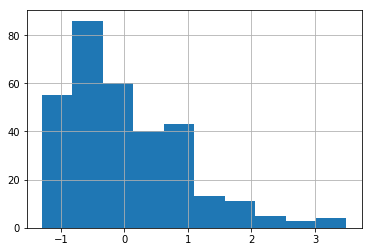

In [21]:
regular_interaction_type_index = create_index(data, ['01030', '01031', '01032', '01033', '01034'], [1,2,3,4,5])
other_interaction_type_index = create_index(data, ['01036', '01037', '01038', '01039', '01040'], [1,2,3,4,5])
interaction_type_index = regular_interaction_type_index * contact_type_ratio + other_interaction_type_index * (1 - contact_type_ratio)
interaction_type_index.hist()

In [22]:
interaction_type_index.idxmax(), interaction_type_index.idxmin()

(201, 156)

In [23]:
data['soc_code'][84], data['soc_code'][184]

('251032', '393011')

### Entry-level/Experienced

| Estimate code | Name |
|---------------|------|
|00107|Percent of workers, prior work experience is required|
|00111|Days of prior work experience (50th Percentile - median)|
|00098|Percent of workers, pre-employment training is required|
|00104|Days of pre-employment training (50th Percentile - median)|
|00122|Percent of workers, post-employment training is required|
|00119|Days of post-employment training (50th Percentile - median)|

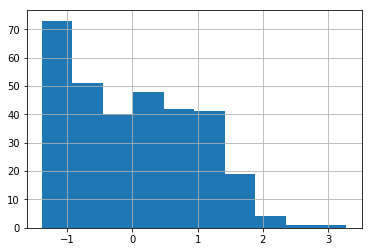

In [24]:
experience_index = create_index(data, ['00107', '00111', '00098', '00104', '00122', '00119'])
experience_index.hist()

### Ambiguous Decision Making

| Estimate code | Weight | Name |
| ------------- | ------ | ---- |
| 01068|1|Percent of workers, type of decision making is no set responses|
|01069|2|Percent of workers, type of decision making is degree of uncertainty or complexity|

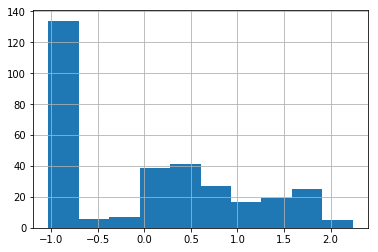

In [25]:
uncertain_decisions_index = create_index(data, ['01068', '01069'], [1, 2])
uncertain_decisions_index.hist()

## Outputting Values


    Physicality
    Pace of work
    Variety
    Danger
    Communication
        Type of interaction
    Entry-level/experienced
    Ambiguous decision making

In [38]:
output = pandas.DataFrame({
    'soc_code': data['soc_code'],
    'physicality': physicality_index,
    'pace_of_work': pace_of_work_index,
    'variety': variety_index,
    'danger': danger_index,
    'communication': communication_index,
    'interaction_complexity': interaction_type_index,
    'experience': experience_index,
    'uncertain_decisions': uncertain_decisions_index
})
output.set_index('soc_code', inplace=True)
output.head()

,communication,danger,experience,interaction_complexity,pace_of_work,physicality,uncertain_decisions,variety
soc_code,,,,,,,,
000000,0.217566,0.230495,1.050002,0.515043,0.589810,0.399198,0.334232,1.402005
110000,0.215913,-0.299971,1.707406,2.282190,0.283505,-0.449087,1.769540,1.588060
111011,0.540168,-0.541306,0.398697,2.333767,0.962482,-0.751402,2.237894,0.452748
111021,0.777170,-0.300960,0.440351,1.839416,-0.517994,-0.428323,1.784039,1.616338
112021,-0.050012,-0.588087,0.349113,2.418221,-0.517994,-0.911465,1.950008,1.155236


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10b478278>,
      dtype=object)

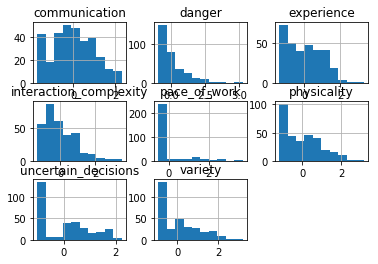

In [39]:
output.hist()

In [40]:
occupations = pandas.read_csv(
    'ordata/or.occupation', 
    delimiter='\t', 
    index_col=False, 
    usecols=['soc_code', 'occupation_text'],
    converters={'soc_code': lambda a: a[:6]}
)
occupations.set_index('soc_code', inplace=True)
occupations.head()

,occupation_text
soc_code,
000000,All Workers
111011,Chief Executives
111021,General and Operations Managers
112021,Marketing Managers
112022,Sales Managers


In [45]:
output = occupations.join(output)
output.head()

,occupation_text,communication,danger,experience,interaction_complexity,pace_of_work,physicality,uncertain_decisions,variety
soc_code,,,,,,,,,
000000,All Workers,0.217566,0.230495,1.050002,0.515043,0.589810,0.399198,0.334232,1.402005
110000,Management Occupations,0.215913,-0.299971,1.707406,2.282190,0.283505,-0.449087,1.769540,1.588060
111011,Chief Executives,0.540168,-0.541306,0.398697,2.333767,0.962482,-0.751402,2.237894,0.452748
111021,General and Operations Managers,0.777170,-0.300960,0.440351,1.839416,-0.517994,-0.428323,1.784039,1.616338
112021,Marketing Managers,-0.050012,-0.588087,0.349113,2.418221,-0.517994,-0.911465,1.950008,1.155236


In [46]:
output.to_csv('calculated_metrics.csv')

In [ ]:
output.sort_values(by='experience')['occupation_text']

In [ ]:
pearson_corr = output.corr('pearson')
pearson_corr

In [ ]:
spearman_corr = output.corr('spearman')
spearman_corr